This notebook illustrates the use of the hbq library to compute a two-dimensional scan of the diabatic electronic Hamiltonian in the plane defined by the effective modes $(Q_1, Q_9)$

In [6]:
# General imports
import sys
sys.path.append('C:\\Users\\david\\Documents\\Codes\\HBQ')   # local path where the folder hbq is located
import hbq

import numpy as np
import matplotlib.pyplot as plt

AU2EV = 27.21138

In [8]:
#
# Scan in the (Q1,Q9) plane
#

Q1 = np.linspace(-2.5,12,30)
Q9 = np.linspace(-4.0,4.0,17)

H_el = np.zeros((len(Q1),len(Q9),4,4))   # diabatic electronic Hamiltonian (ground state - decoupled - and three excited coupled states)
Q = np.zeros(66)                         # 66 modes

for i1 in range(len(Q1)):
    Q[0] = Q1[i1]
    for i2 in range(len(Q9)):
        Q[8] = Q9[i2]
        H_el[i1,i2,:,:] = hbq.electronic_hamiltonian_q(Q) * AU2EV

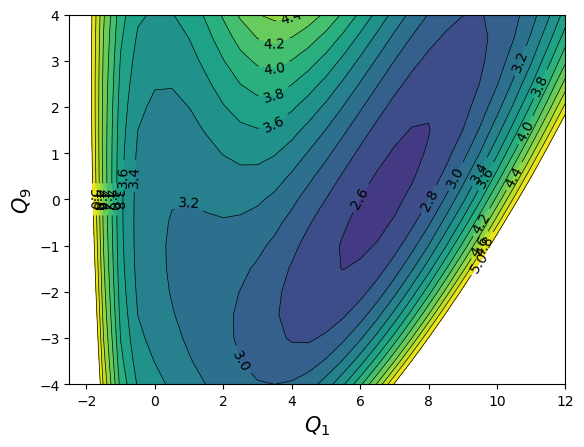

In [10]:
# Plot the 2D scan for the lowest pipi* state
levels = np.linspace(2.0, 5.0, 16)     
mg = np.meshgrid(Q1,Q9)        

plt.contourf(mg[0], mg[1], H_el[:,:,1,1].T,
             levels = levels)
cs = plt.contour(mg[0], mg[1], H_el[:,:,1,1].T,
            levels = levels, colors = 'black', linewidths = 0.5)

plt.xlabel('$Q_1$', fontsize = 15)
plt.ylabel('$Q_9$', fontsize = 15)
plt.clabel(cs, inline = True)

plt.show()